# Elastic field around a Griffith crack

Plane Elastic problem

Displacements and stresses around a straight crack  $ x_1 \in [-a,a] $ under pure tensile loading $\sigma$.

We test the computation of the displacement and stress at observation points by setting the solution of the collocation BEM to the analytical solution on the BE mesh.


The crack displacement discontinuity is given by for $ x_1 \in [-a,a] $:

$\Delta u_1 (x_1,x_2=0)= u_1 (x_1,x_2=0^+)-u_1 (x_1,x_2=0^-)=0 $ 

$\Delta u_2 (x_1,x_2=0)= u_2 (x_1,x_2=0^+)-u_2 (x_1,x_2=0^-)= \frac{4 \sigma}{E^\prime} \sqrt{a^2-x_1^2} =\frac{2 (1-\nu) \sigma}{G} \sqrt{a^2-x_1^2}  $ 

where $E^\prime = E / (1-\nu^2) $ is the plane strain Young's modulus, $G = E/ (2(1+\nu)) $ the shear modulus, $E$ the Young's modulus and $\nu$ the Poisson's ratio.

In [1]:
import sys
import os
home = os.environ["HOME"]
print('getcwd:      ', os.getcwd())

# load the analytical solution 

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))
from solutions.griffith_crack import displacement_griffith,stress_griffith


getcwd:       /Users/bricelecampion/ClionProjects/BigWham-Tutorials/examples


In [2]:
# %% importing BigWham 
import sys
import os
import numpy as np
import time


home = os.environ["HOME"]
sys.path.append("/Users/bricelecampion/ClionProjects/BigWham_dev/build/interfaces/python")
from hmatrix import Hmatrix


In [3]:
#%% Elastic properties
G = 1.0
nu = 0.25
E = (2 * G) * (1 + nu)
Eprime = E/(1-nu**2)
# %% Mesh 
a = 1.
nelts = 101
coor1D = np.linspace(-a, a, nelts + 1)
coor = np.transpose(np.array([coor1D, coor1D * 0.0]))
conn = np.fromfunction(lambda i, j: i + j, (nelts, 2), dtype=np.int_)


In [4]:
kernel = "2DP0"
elas_prop = np.array([E, nu])
eta=3.0
max_leaf_size = 64
eps_aca = 1.0e-3
h = Hmatrix(kernel, coor, conn, elas_prop, max_leaf_size, eta, eps_aca)

colpts=h.getCollocationPoints()


In [5]:
h.get_omp_threads()

16

In [6]:
# x
x_obs=np.linspace(-3*a,3*a,500)
yoffset = 0.17
obs_pts = np.transpose([x_obs , x_obs*0.+yoffset])
#
u,v = displacement_griffith(x_obs+yoffset*(1j),a=a,sig=1,nu=nu,G=G)


In [7]:
w = (4*1/Eprime)*np.sqrt(a**2-colpts[:,0]**2)   # Crack opening displacement discontinuity from analytical solution 
# compute displacement via BEM representation
d = np.transpose([w*0.,w])
zt = time.process_time()
disp=h.compute_displacements(obs_pts,-d)   # minus sign due to convention of positive dd in overlap in the inner of Bigwham....
zt = time.process_time()
elapsed = (time.process_time() - zt) 
print("number of active threads for MatVec", h.get_omp_threads())
print("elapsed time", elapsed)


number of active threads for MatVec 16
elapsed time 5.8000000000113516e-05


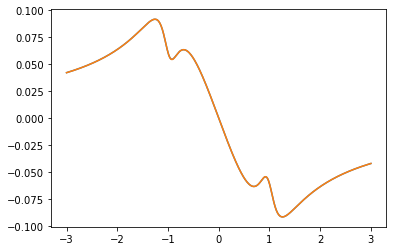

In [8]:
import matplotlib.pyplot as plt

# evolution of u_1 along a line at y = yoffset 
plt.plot(x_obs,disp[:,0])
plt.plot(x_obs,u)


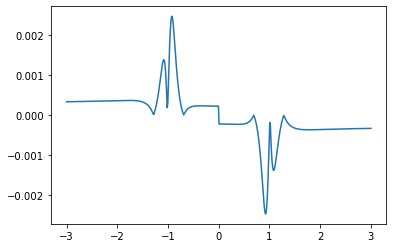

In [9]:
# relative difference
plt.plot(x_obs,abs(disp[:,0]-u)/u)


0.75

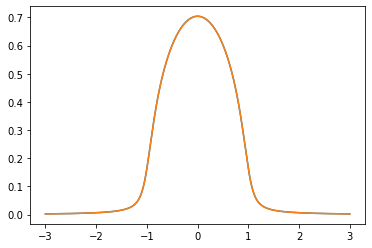

In [10]:
plt.plot(x_obs,disp[:,1])
plt.plot(x_obs,v)
2/Eprime
w.max()/2

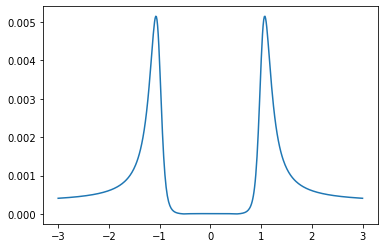

In [11]:
# relative difference
plt.plot(x_obs,abs(disp[:,1]-v)/v)

# Evolution of Stresses around a griffith crack

In [12]:
# results from collocation BEM observation (with known solution for the relative DD)
sigma=h.compute_stresses(obs_pts,-d)   # minus sign due to convention of positive dd in overlap in the inner of Bigwham....

In [13]:
# analytical results
s_11,s_22,s_12 = stress_griffith(x_obs+yoffset*(1j),a=a,sig=1,nu=nu)



9.347183722030472e-05

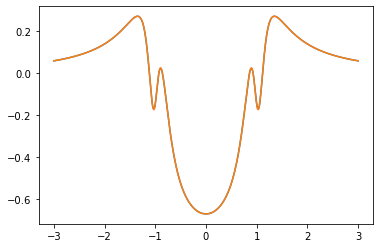

In [19]:
plt.plot(x_obs,sigma[:,0])
plt.plot(x_obs,s_11)
np.median(np.abs(s_11-sigma[:,0]))

0.0001935100334581885

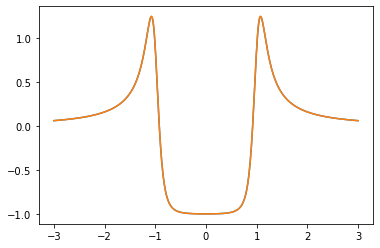

In [18]:
plt.plot(x_obs,sigma[:,1])
plt.plot(x_obs,s_22)
np.median(np.abs(s_22-sigma[:,1]))

4.1108961812410735e-05

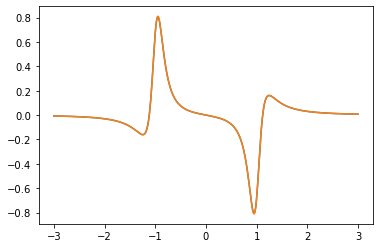

In [17]:
plt.plot(x_obs,sigma[:,2])
plt.plot(x_obs,s_12)
np.median(np.abs(s_12-sigma[:,2]))